#** Tarea Unidad 6 "Machine Learning"**

Grupo M:
Lucia Cortes
María Fernanda Farias
Favio Ruggieri
Alejandro Gomez
Sergio Salanitri
Karina Calvo

## Predicción de Diabetes
El archivo contiene datos médicos y demográficos de pacientes junto con su estado de diabetes, ya sea positivo o negativo.
Las características son edad, género, índice de masa corporal (IMC), hipertensión, enfermedad cardíaca, historial de tabaquismo, nivel de HbA1c y nivel de glucosa en sangre.
El trabajo busca utilizar este dataset para construir modelos de aprendizaje automático que pueden predecir la probabilidad de diabetes en función de su historial médico y detalles demográficos.
Dataset disponible en https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

## Análisis Exploratorio de Datos

In [1]:
# Intalación de librerias
!pip install missingno


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Intalación de librerias
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder

In [3]:
# 1. Cargar dataset
df=pd.read_csv("diabetes_prediction_dataset.csv", sep=',', low_memory=False)

In [4]:
# 2. Info del dataset
df.shape

(100000, 9)

In [5]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
for column in df.columns:
    num_unique_values = df[column].nunique()
    print(f'Number of unique values in {column}: {num_unique_values}')

Number of unique values in gender: 3
Number of unique values in age: 102
Number of unique values in hypertension: 2
Number of unique values in heart_disease: 2
Number of unique values in smoking_history: 6
Number of unique values in bmi: 4247
Number of unique values in HbA1c_level: 18
Number of unique values in blood_glucose_level: 18
Number of unique values in diabetes: 2


In [8]:
# 3. Estadística descriptiva
df.describe(include="all")

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


In [9]:
# 4. Limpieza de datos
df.isnull().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [10]:
# Remover filas duplicadas y actualizar el DataFrame
df_cleaned = df.drop_duplicates()

In [11]:
df_cleaned.shape


(96146, 9)

In [12]:
print(f'Filas duplicadas eliminadas: {df.shape[0] - df_cleaned.shape[0]}')

Filas duplicadas eliminadas: 3854


<Axes: xlabel='age'>

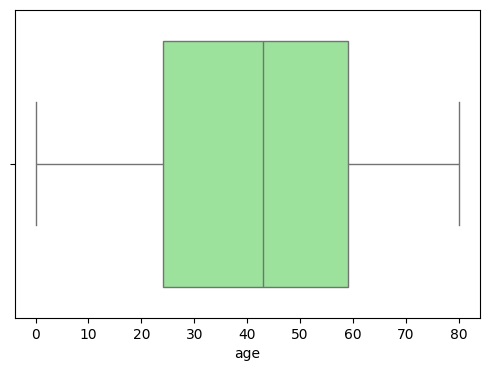

In [13]:
# 5. Detección de outliers

# Detección de outliers AGE
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_cleaned['age'], color='lightgreen')

<Axes: xlabel='bmi'>

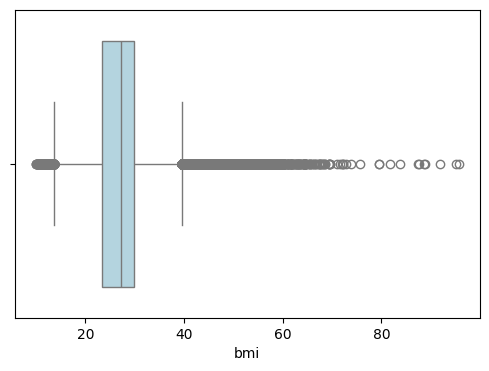

In [14]:
# Detección de outliers BMI
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_cleaned['bmi'], color='lightblue')

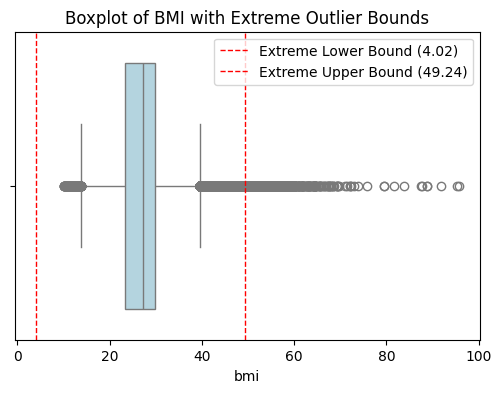

In [15]:
# Calculate Q1, Q3, and IQR for 'bmi'
Q1_bmi = df_cleaned['bmi'].quantile(0.25)
Q3_bmi = df_cleaned['bmi'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi

# Define bounds for extreme outliers
lower_bound_extreme = Q1_bmi - 3 * IQR_bmi
upper_bound_extreme = Q3_bmi + 3 * IQR_bmi

# Re-plot the boxplot with outlier bounds marked
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_cleaned['bmi'], color='lightblue')

# Add vertical lines for the extreme outlier bounds
plt.axvline(lower_bound_extreme, color='red', linestyle='dashed', linewidth=1, label=f'Extreme Lower Bound ({lower_bound_extreme:.2f})')
plt.axvline(upper_bound_extreme, color='red', linestyle='dashed', linewidth=1, label=f'Extreme Upper Bound ({upper_bound_extreme:.2f})')

plt.title('Boxplot of BMI with Extreme Outlier Bounds')
plt.legend()
plt.show()

In [16]:
# Count the number of BMI values greater than 50
bmi_greater_than_50 = df_cleaned[df_cleaned['bmi'] > 50].shape[0]

print(f'Number of individuals with BMI greater than 50: {bmi_greater_than_50}')

Number of individuals with BMI greater than 50: 778


In [17]:
# Exclude rows with BMI greater than 50
df_filtered_bmi = df_cleaned[df_cleaned['bmi'] <= 50].copy()

print(f'Shape of the DataFrame after removing BMI outliers: {df_filtered_bmi.shape}')

Shape of the DataFrame after removing BMI outliers: (95368, 9)


In [18]:
df_filt = df_filtered_bmi.copy()
df_filt.shape

(95368, 9)

<Axes: xlabel='HbA1c_level'>

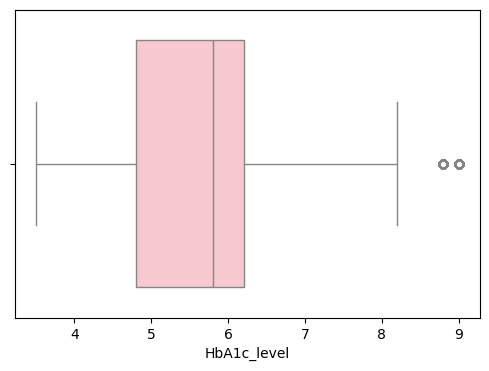

In [19]:
# Detección de outliers # Detección de outliers HbA1c_level
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_filt['HbA1c_level'], color='pink')


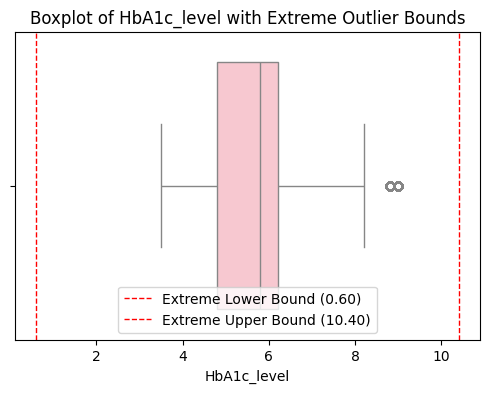

In [20]:
# Calculate Q1, Q3, and IQR for 'HbA1c'
Q1_HbA1c = df_filt['HbA1c_level'].quantile(0.25)
Q3_HbA1c = df_filt['HbA1c_level'].quantile(0.75)
IQR_HbA1c = Q3_HbA1c - Q1_HbA1c

# Define bounds for extreme outliers
lower_bound_extreme = Q1_HbA1c - 3 * IQR_HbA1c
upper_bound_extreme = Q3_HbA1c + 3 * IQR_HbA1c

# Re-plot the boxplot with outlier bounds marked
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_filt['HbA1c_level'], color='pink')

# Add vertical lines for the extreme outlier bounds
plt.axvline(lower_bound_extreme, color='red', linestyle='dashed', linewidth=1, label=f'Extreme Lower Bound ({lower_bound_extreme:.2f})')
plt.axvline(upper_bound_extreme, color='red', linestyle='dashed', linewidth=1, label=f'Extreme Upper Bound ({upper_bound_extreme:.2f})')

plt.title('Boxplot of HbA1c_level with Extreme Outlier Bounds')
plt.legend()
plt.show()

No hay outlier extremos en los niveles de HbA1c

<Axes: xlabel='blood_glucose_level'>

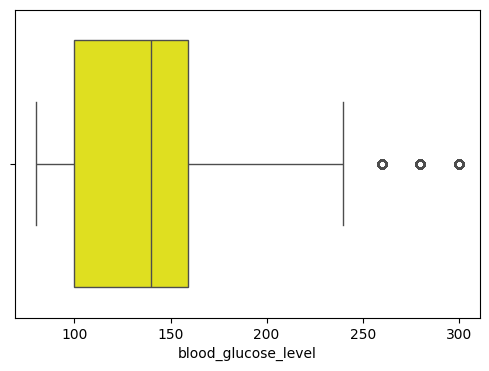

In [21]:
# Detección de outliers blood_glucose_level
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_filt['blood_glucose_level'], color='yellow')

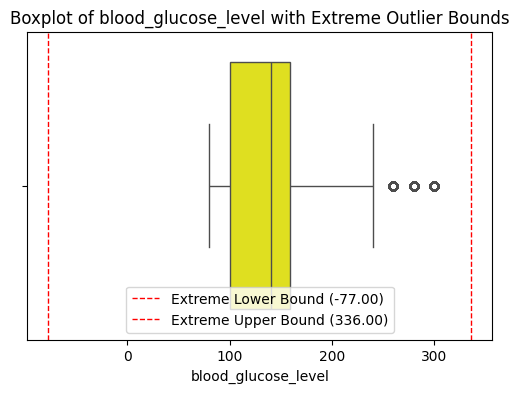

In [22]:
# Calculate Q1, Q3, and IQR for 'blood_glucose_level'
Q1_blood_glucose_level = df_filt['blood_glucose_level'].quantile(0.25)
Q3_blood_glucose_level = df_filt['blood_glucose_level'].quantile(0.75)
IQR_blood_glucose_level = Q3_blood_glucose_level - Q1_blood_glucose_level

# Define bounds for extreme outliers
lower_bound_extreme = Q1_blood_glucose_level - 3 * IQR_blood_glucose_level
upper_bound_extreme = Q3_blood_glucose_level + 3 * IQR_blood_glucose_level

# Re-plot the boxplot with outlier bounds marked
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_filt['blood_glucose_level'], color='yellow')

# Add vertical lines for the extreme outlier bounds
plt.axvline(lower_bound_extreme, color='red', linestyle='dashed', linewidth=1, label=f'Extreme Lower Bound ({lower_bound_extreme:.2f})')
plt.axvline(upper_bound_extreme, color='red', linestyle='dashed', linewidth=1, label=f'Extreme Upper Bound ({upper_bound_extreme:.2f})')

plt.title('Boxplot of blood_glucose_level with Extreme Outlier Bounds')
plt.legend()
plt.show()

No hay outlier extremos en los niveles de glucosa

([<matplotlib.patches.Wedge at 0x194a36f1650>,
 [Text(-1.0630075780880062, -0.28286903140406117, 'Female'),
  Text(1.0631751601709782, 0.28223851401857797, 'Male'),
  Text(0.00065213238622099, 1.0999998066924153, 'Other')],
 [Text(-0.5798223153207306, -0.1542921989476697, '58.3%'),
  Text(0.5799137237296245, 0.15394828037376979, '41.7%'),
  Text(0.00035570857430235816, 0.5999998945594992, '0.0%')])

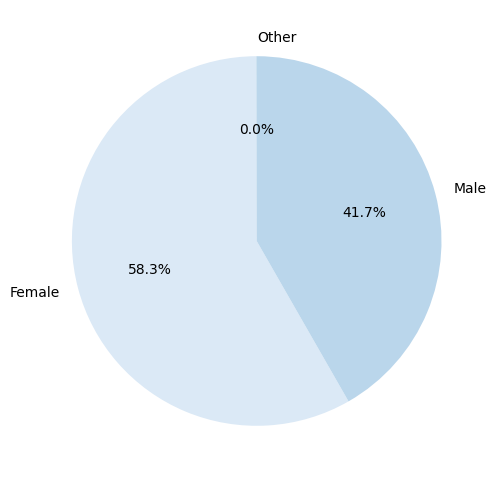

In [23]:
gender_counts = df_filt['gender'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Blues'))

<Axes: xlabel='HbA1c_level', ylabel='Count'>

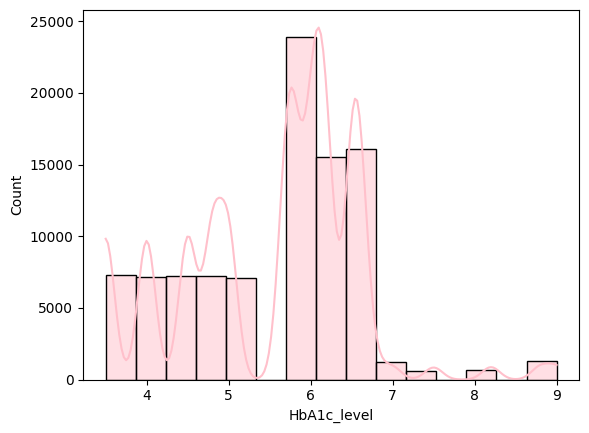

In [24]:
# 6. Análisis univariado HbA1c_level
sns.histplot(df_filt['HbA1c_level'], bins=15, kde=True, color='pink')

<Axes: xlabel='blood_glucose_level', ylabel='Count'>

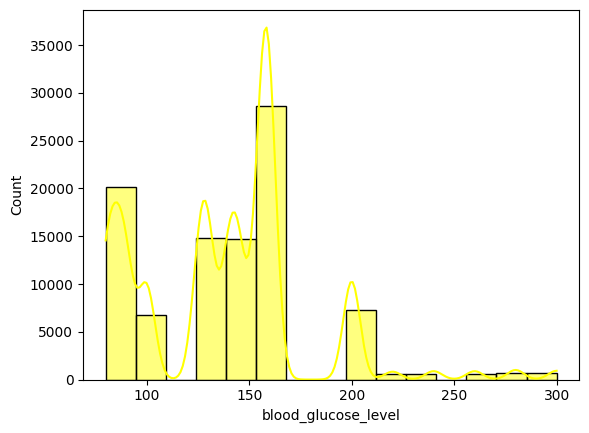

In [25]:
# 6. Análisis univariado blood_glucose_level
sns.histplot(df_filt['blood_glucose_level'], bins=15, kde=True, color='yellow')

In [26]:
smoking_mapping = {
    'never': 1,
    'not current': 2,
    'former': 3,
    'current': 4,
    'ever': 5,
    'No Info': 6
}

df_filt['smoking_history_encoded'] = df_filt['smoking_history'].map(smoking_mapping)

display(df_filt[['smoking_history', 'smoking_history_encoded']].head())

,smoking_history,smoking_history_encoded
0,never,1
1,No Info,6
2,never,1
3,current,4
4,current,4


In [27]:
# 7. Análisis Bivariado
# Select only numeric columns for correlation matrix
df_numeric = df_filt.select_dtypes(include=np.number)

# Computar matriz de correlación
corr_matrix = df_numeric.corr()

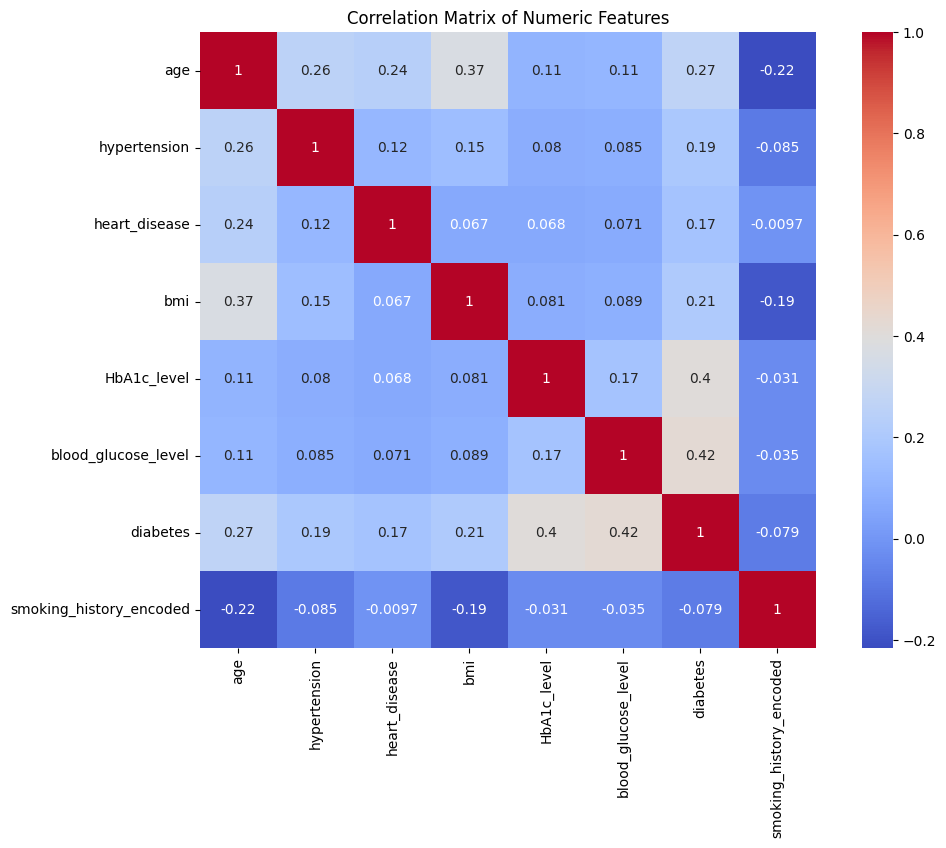

In [28]:
# Generate heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

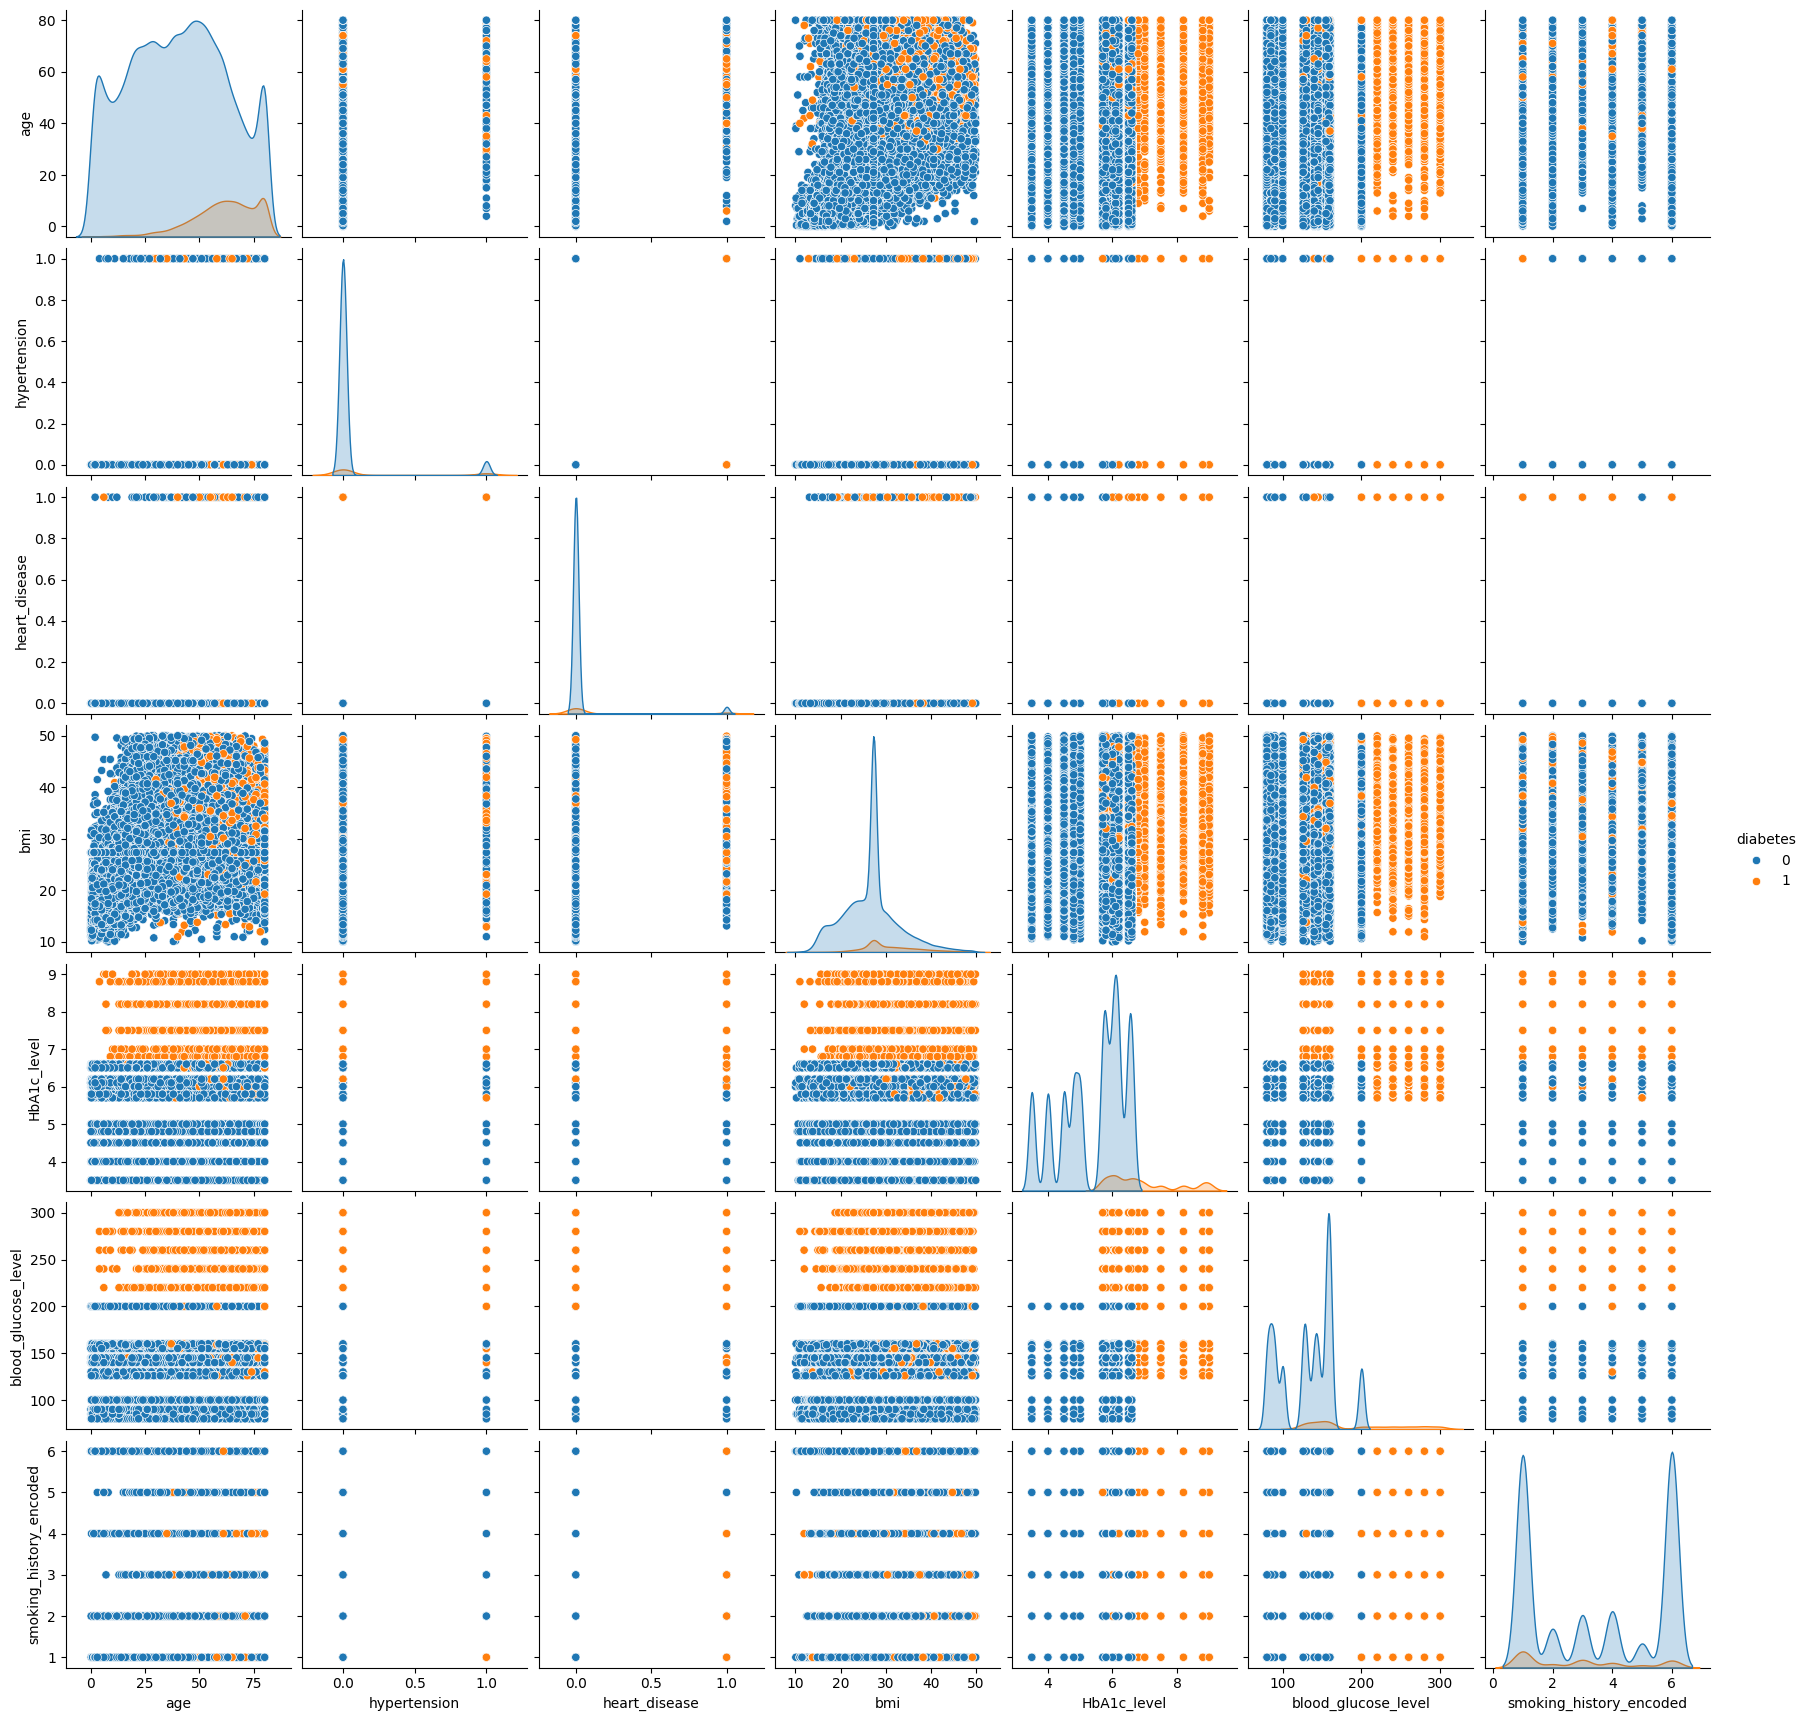

In [29]:
sns.pairplot(df_filt, hue='diabetes')

## Evaluación de Modelos de Árboles de Decisión

In [ ]:
# LIBRERIAS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# PARAMETROS

rnd_state = 42

In [ ]:
# Diabetes es el target = 1, lo que buscamos. Para otro caso, es 0
target = np.where(df_filt['diabetes'], 1, 0)
target

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
positivos = np.sum(target)
total = np.size(target)
print('Porcentaje de positivos: {:.2f}%'.format(100 * positivos / total))

Porcentaje de positivos: 8.65%


In [ ]:
df_filt.drop(['diabetes'], axis=1, inplace=True)
df_filt['target']=target

In [ ]:
df_filt.dtypes


,0
gender,object
age,category
hypertension,category
heart_disease,category
smoking_history,object
bmi,category
HbA1c_level,category
blood_glucose_level,category
smoking_history_encoded,category
target,int64


In [ ]:
df_filt.drop('smoking_history', axis=1, inplace=True)
display(df_filt.head())

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,target
0,Female,80.0,0,1,25.19,6.6,140,1,0
1,Female,54.0,0,0,27.32,6.6,80,6,0
2,Male,28.0,0,0,27.32,5.7,158,1,0
3,Female,36.0,0,0,23.45,5.0,155,4,0
4,Male,76.0,1,1,20.14,4.8,155,4,0


In [ ]:
categorical_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'smoking_history_encoded']

for col in categorical_columns:
    df_filt[col] = df_filt[col].astype("category")

## XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
X = df_filt.drop('target', axis=1)
y = df_filt['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rnd_state, stratify=y)

In [ ]:
def my_XGB_report(X_train, y_train, X_test, y_test, model=None):

    # Entrenar modelo si no se pasa uno ya entrenado
    if model is None:
        model = XGBClassifier(
            random_state=42,
            use_label_encoder=False,
            eval_metric='logloss',
            enable_categorical=True
        )
        model.fit(X_train, y_train)

    # Predicciones
    y_hat = model.predict(X_test)

    # Métricas
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test, y_hat), 4)
    error_rate = round(1 - accuracy, 4)
    precision = round(precision_score(y_test, y_hat), 2)
    recall = round(recall_score(y_test, y_hat), 2)
    f1score = round(f1_score(y_test, y_hat), 2)

    cm_labeled = pd.DataFrame(cm,
                              index=['Actual : negativos', 'Actual : positivos'],
                              columns=['Predicción : negativos', 'Predicción : positivos'])

    # Reporte
    print("-----------------------------------------")
    print("Dataset")
    print('Tamaño train: {}'.format(X_train.shape[0]))
    print('Tamaño test: {}'.format(X_test.shape[0]))
    print('Porcentaje de positivos: {:.2f}%'.format(100 * np.sum(y_train) / np.size(y_train)))
    print("-----------------------------------------")
    print("Resultados")
    print('Accuracy  = {}'.format(accuracy))
    print('Error_rate  = {}'.format(error_rate))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print("-----------------------------------------")

    return cm_labeled

-----------------------------------------
Dataset
Tamaño train: 66757
Tamaño test: 28611
Porcentaje de positivos: 8.65%
-----------------------------------------
Resultados
Accuracy  = 0.9709
Error_rate  = 0.0291
Precision = 0.96
Recall    = 0.69
f1_score  = 0.8
-----------------------------------------


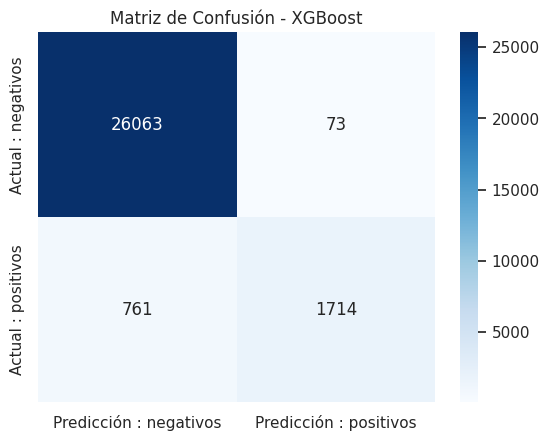

In [ ]:
cm = my_XGB_report(X_train, y_train, X_test, y_test)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
plt.title("Matriz de Confusión - XGBoost")
plt.show()

Fitting 3 folds for each of 48 candidates, totalling 144 fits
-----------------------------------------
Dataset
Tamaño train: 66757
Tamaño test: 28611
Porcentaje de positivos: 8.65%
-----------------------------------------
Resultados
Accuracy  = 0.9716
Error_rate  = 0.0284
Precision = 0.99
Recall    = 0.68
f1_score  = 0.81
-----------------------------------------


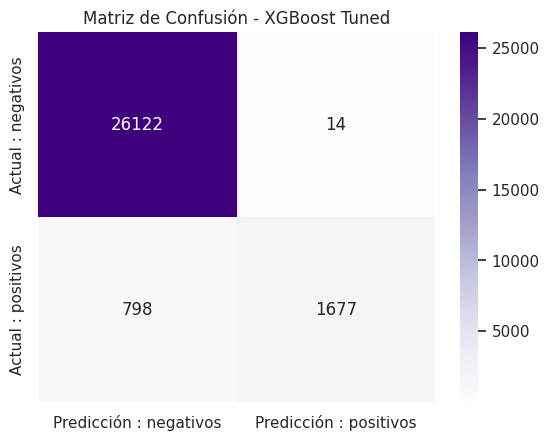

In [ ]:
# Grid de hiperparámetros para XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Instanciamos el clasificador base
xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    enable_categorical=True
)

# GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=3,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

# Entrenamiento con los datos
grid_search_xgb.fit(X_train, y_train)

# Mejor modelo
best_xgb_model = grid_search_xgb.best_estimator_

# Reporte
cm_xgb_tuned = my_XGB_report(X_train, y_train, X_test, y_test, model=best_xgb_model)
sns.heatmap(cm_xgb_tuned, annot=True, cmap="Purples", fmt='d')
plt.title("Matriz de Confusión - XGBoost Tuned")
plt.show()

## LIGHTGBM

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
def my_LGBM_report(X_train, y_train, X_test, y_test, model=None):
    # Entrenar modelo si no se pasa uno ya entrenado
    if model is None:
        model = LGBMClassifier(
            random_state=42,
            verbose=-1
        )
        model.fit(X_train, y_train)

    # Predicciones
    y_hat = model.predict(X_test)

    # Métricas
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test, y_hat), 4)
    error_rate = round(1 - accuracy, 4)
    precision = round(precision_score(y_test, y_hat), 2)
    recall = round(recall_score(y_test, y_hat), 2)
    f1score = round(f1_score(y_test, y_hat), 2)

    cm_labeled = pd.DataFrame(cm,
                              index=['Actual : negativos', 'Actual : positivos'],
                              columns=['Predicción : negativos', 'Predicción : positivos'])

    # Reporte
    print("-----------------------------------------")
    print("Dataset")
    print('Tamaño train: {}'.format(X_train.shape[0]))
    print('Tamaño test: {}'.format(X_test.shape[0]))
    print('Porcentaje de positivos: {:.2f}%'.format(100 * np.sum(y_train) / np.size(y_train)))
    print("-----------------------------------------")
    print("Resultados")
    print('Accuracy  = {}'.format(accuracy))
    print('Error_rate  = {}'.format(error_rate))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print("-----------------------------------------")

    return cm_labeled

-----------------------------------------
Dataset
Tamaño train: 66757
Tamaño test: 28611
Porcentaje de positivos: 8.65%
-----------------------------------------
Resultados
Accuracy  = 0.9693
Error_rate  = 0.0307
Precision = 0.95
Recall    = 0.68
f1_score  = 0.79
-----------------------------------------


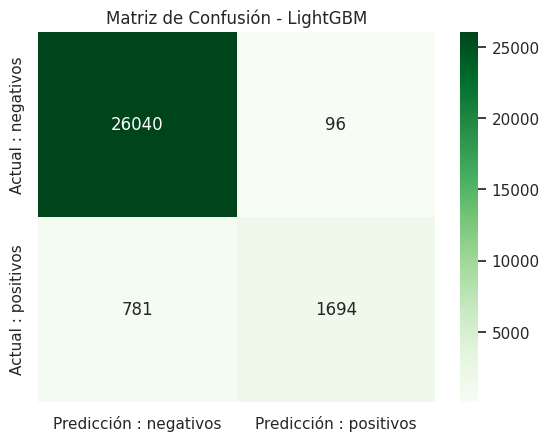

In [ ]:
cm_lgbm = my_LGBM_report(X_train, y_train, X_test, y_test)
sns.heatmap(cm_lgbm, annot=True, cmap="Greens", fmt='d')
plt.title("Matriz de Confusión - LightGBM")
plt.show()

Fitting 3 folds for each of 48 candidates, totalling 144 fits
-----------------------------------------
Dataset
Tamaño train: 66757
Tamaño test: 28611
Porcentaje de positivos: 8.65%
-----------------------------------------
Resultados
Accuracy  = 0.9704
Error_rate  = 0.0296
Precision = 0.97
Recall    = 0.68
f1_score  = 0.8
-----------------------------------------


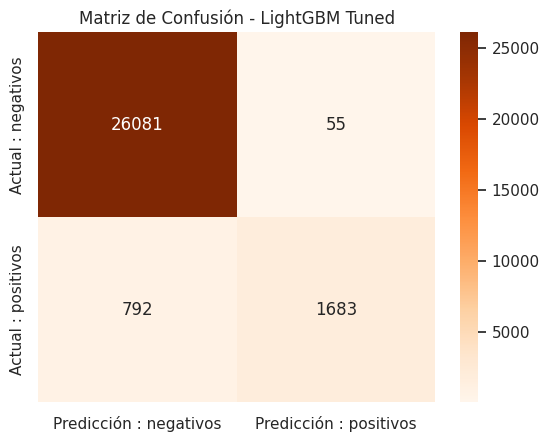

In [ ]:
# Grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'num_leaves': [15, 31],
    'min_child_samples': [10, 20]
}

# Instanciamos el clasificador base
lgbm = LGBMClassifier(random_state=42, verbose=-1)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

# Entrenamos con el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Reporte con el mejor modelo
cm_lgbm_tuned = my_LGBM_report(X_train, y_train, X_test, y_test, model=best_model)
sns.heatmap(cm_lgbm_tuned, annot=True, cmap="Oranges", fmt='d')
plt.title("Matriz de Confusión - LightGBM Tuned")
plt.show()

FALTA CAT BOOST Y COMPARATIVA FINAL